In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge
from scipy import stats
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("export.csv")
df



,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

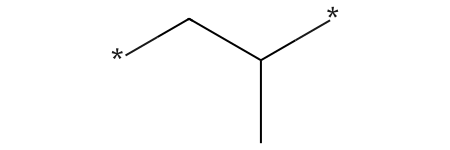

In [4]:
test = "[*]CC([*])C"
t = Chem.MolFromSmiles(test)
t

In [5]:
Chem.MolToSmiles(t)

'*CC(*)C'

In [6]:
!pip install mordred

In [7]:
from mordred import Calculator, descriptors
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [8]:
Morgan_fpts = morgan_fpts(df['smiles'])

In [9]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [11]:
mordred_descriptors = All_Mordred_descriptors(df['smiles'])

  7%|█████▉                                                                         | 469/6265 [00:14<06:30, 14.85it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▎                                                                      | 660/6265 [00:25<03:42, 25.22it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▎                                                                      | 663/6265 [00:25<10:21,  9.01it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▌                                                                      | 677/6265 [00:28<24:13,  3.84it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▋                                                                      | 693/6265 [00:29<09:16, 10.01it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▊                                                                      | 699/6265 [00:29<08:55, 10.38it/s]

C:\Users\gauri\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████| 6265/6265 [05:30<00:00, 18.96it/s]


In [12]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,42.046950,3.822450,18,2,16.0,14.0,3.361111,1.333333
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,46.021878,5.752735,18,2,16.0,14.0,3.361111,1.333333
2,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,64.012457,8.001557,28,3,24.0,22.0,4.312500,1.375000
3,4.876567,5.209852,0,0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,82.003035,10.250379,42,6,30.0,30.0,5.173611,1.500000
4,7.063820,7.558525,0,0,9.907543,2.343259,4.686518,9.907543,0.990754,3.162641,...,9.223158,39.914584,128.024913,9.144637,115,13,46.0,50.0,6.625000,2.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,14.142228,13.273201,0,0,21.307960,2.474677,4.876137,21.307960,1.183776,3.827745,...,9.973433,67.244773,263.969055,11.998593,601,27,98.0,116.0,8.069444,3.673611
6261,7.818707,8.481783,0,0,11.420199,2.393403,4.786805,11.420199,1.038200,3.263704,...,9.447071,41.712231,143.983442,13.089404,144,17,52.0,59.0,7.486111,2.395833
6262,11.435146,11.493514,0,0,16.837003,2.449034,4.855714,16.837003,1.122467,3.618692,...,9.755625,61.091398,209.976249,12.351544,343,22,78.0,90.0,8.208333,3.083333
6263,12.142253,11.497525,0,0,18.104933,2.435203,4.870405,18.104933,1.131558,3.675879,...,9.817548,48.797213,204.019828,10.200991,420,25,82.0,94.0,8.458333,3.333333


In [13]:
y2 = df.iloc[824:4203,:].value
x= mordred_descriptors.iloc[824:4203,0:10]

x2 = x.dropna(axis=1)

In [14]:
x2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A
824,3.644924,4.097495,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800
825,4.352030,4.798324,0,0,7.878462,1.969616,3.939231,7.878462,1.125495,2.752840
826,5.277917,5.655215,0,0,8.565187,2.042079,4.084158,8.565187,1.070648,2.899769
827,5.766244,5.909452,0,0,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531
828,9.301778,8.355849,0,0,16.400274,2.165325,4.330650,16.400274,1.261560,3.436880
...,...,...,...,...,...,...,...,...,...,...
4198,12.108302,11.067651,0,2,18.505186,2.220646,4.441292,18.505186,1.088540,3.677525
4199,15.643836,13.045134,0,2,25.144781,2.199740,4.399481,25.144781,1.142945,3.930772
4200,21.300690,15.704674,0,2,35.371127,2.199784,4.399568,35.371127,1.179038,4.236755
4201,13.586724,12.816858,0,0,20.109195,2.458020,4.916040,20.109195,1.117178,3.790014


In [15]:
regressor2=MLPRegressor()
regressor2.fit(x2, y2) 


predictions2 = regressor2.predict(x2)

result2 = x2
result2['value'] = y2
result2['prediction'] = predictions2.tolist()
result2.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,value,prediction
824,3.644924,4.097495,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800,6.5170,5.459032
825,4.352030,4.798324,0,0,7.878462,1.969616,3.939231,7.878462,1.125495,2.752840,6.7336,5.516004
826,5.277917,5.655215,0,0,8.565187,2.042079,4.084158,8.565187,1.070648,2.899769,6.7394,5.435916
827,5.766244,5.909452,0,0,9.910095,2.224503,4.194610,9.910095,1.238762,2.984531,6.9613,4.850411
828,9.301778,8.355849,0,0,16.400274,2.165325,4.330650,16.400274,1.261560,3.436880,6.3703,4.648559


R^2 of Atomization energy: 0.4144442256434224
MSE of Atomization energy: 1.1961738037392957


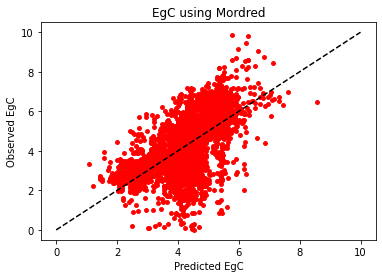

In [16]:
R2 =r2_score(y2,predictions2)
print('R^2 of Atomization energy:', R2)

Rmse = np.sqrt(mean_squared_error(y2, predictions2))
print('MSE of Atomization energy:', Rmse)

plt.scatter(predictions2,y2,c="r",s=15)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using Mordred");

In [17]:
reg= MLPRegressor()

param_grid = {
    'hidden_layer_sizes': [(60), (80,)],
    'max_iter': [200, 400],
}

In [18]:
grid = GridSearchCV(reg, param_grid, n_jobs= -1, cv=5)
grid.fit(x2,y2)

print(grid.best_params_)

{'hidden_layer_sizes': (80,), 'max_iter': 400}


In [19]:
reg2 = MLPRegressor(hidden_layer_sizes= (80), max_iter= 400)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.3)
  
reg2.fit(X_train1, y_train1) 


predictions2 = reg2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Atomization energy:', Rmse)

MSE of Atomization energy: 0.04189254084815315


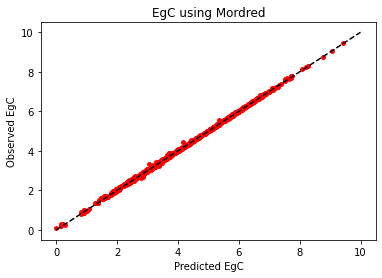

In [21]:
plt.scatter(predictions2,y_test1,c="r",s=15)
plt.plot([0,10], [0,10] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using Mordred");